In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"D:\Social_Network_Ads.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dataset.drop("User ID",axis=1,inplace=True)

In [5]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
dataset.isnull().any()

Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

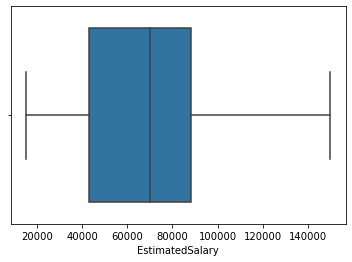

In [7]:
sns.boxplot(dataset["EstimatedSalary"])

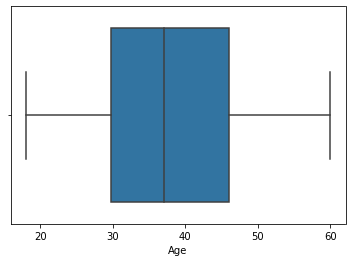

In [8]:
sns.boxplot(dataset["Age"])

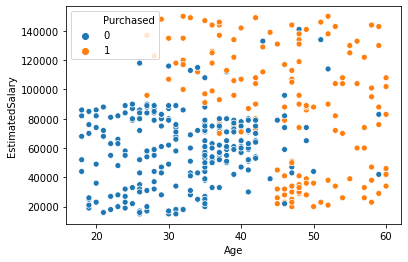

In [9]:
sns.scatterplot(dataset["Age"],dataset["EstimatedSalary"],hue=dataset["Purchased"])

In [10]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


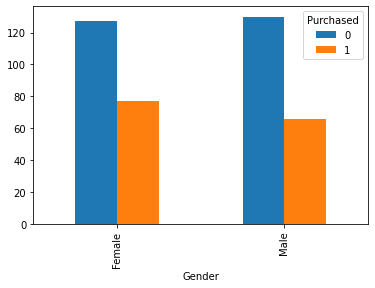

In [11]:
pd.crosstab(dataset["Gender"],dataset["Purchased"]).plot(kind="bar")

In [12]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [13]:
dataset=pd.get_dummies(dataset,columns=["Gender"])

In [14]:
dataset

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [15]:
x=dataset.iloc[:,0:2]#rows,colums

In [16]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [17]:
y=dataset["Purchased"]

In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
#Init MinMax Scaler
sc=MinMaxScaler()

In [23]:
x_train=sc.fit_transform(x_train)

In [24]:
x_test=sc.transform(x_test)

In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

#### Building the model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#Init the KNN model
#n_neighbors--K
#p--Power Parameter
#P=1-->Manhanttan Distance--(x2-x1)^2+(y2-y1)^2
#P=2 -->Euclidean Distance -sqrt((x2-x1)^2+(y2-y1)^2)   1/p
knn_model=KNeighborsClassifier(n_neighbors=5,p=2,weights="distance")

In [28]:
#fit--train the model
knn_model.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

### Prediction

In [29]:
y_pred=knn_model.predict(x_test)

In [30]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64

In [31]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [33]:
print("Test Accuracy:",accuracy_score(y_test,y_pred)*100,"%")

Test Accuracy: 91.25 %


In [34]:
y_pred_train=knn_model.predict(x_train)

In [35]:
y_train

3      0
18     1
202    1
250    0
274    1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 320, dtype: int64

In [36]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train)*100,"%")

Train Accuracy: 99.6875 %


In [37]:
cf_test=confusion_matrix(y_test,y_pred)

In [38]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c431fb5a88>)

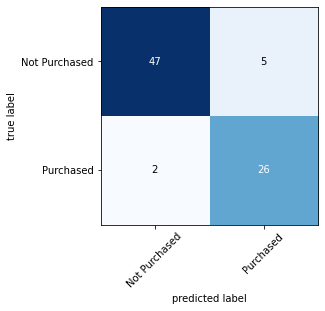

In [39]:
plot_confusion_matrix(cf_test,class_names=["Not Purchased","Purchased"])

In [40]:
cf_train=confusion_matrix(y_train,y_pred_train)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c432404d08>)

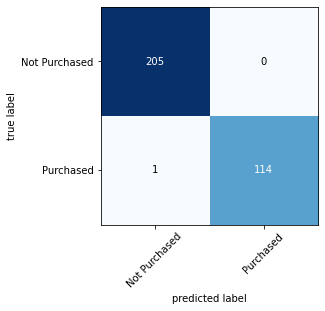

In [41]:
plot_confusion_matrix(cf_train,class_names=["Not Purchased","Purchased"])

In [42]:
dataset["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [43]:
dataset["Purchased"].value_counts()/dataset.shape[0]

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [44]:
from mlxtend.plotting import plot_decision_regions

In [45]:
y_train.values

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

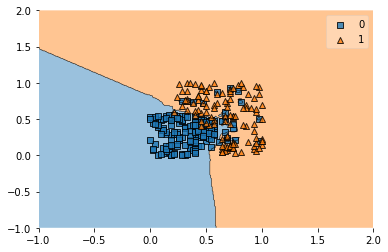

In [46]:
plot_decision_regions(x_train,y_train.values,clf=knn_model)

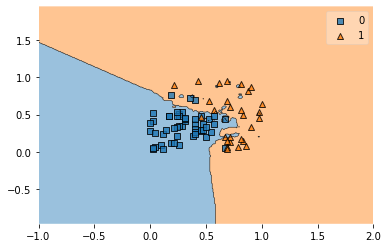

In [47]:
plot_decision_regions(x_test,y_test.values,clf=knn_model)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [57]:
k=list(range(3,40,2))

In [62]:
train_acc_list=[]
test_acc_list=[]
for k_value in k:
    knn_model=KNeighborsClassifier(n_neighbors=k_value,p=2,weights="uniform")
    knn_model.fit(x_train,y_train)
    y_pred=knn_model.predict(x_test)
    y_pred_train=knn_model.predict(x_train)
    test_acc=accuracy_score(y_test,y_pred)
    train_acc=accuracy_score(y_train,y_pred_train)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

In [63]:
train_acc_list

[0.925,
 0.909375,
 0.91875,
 0.9125,
 0.909375,
 0.9125,
 0.90625,
 0.90625,
 0.909375,
 0.903125,
 0.9,
 0.9,
 0.89375,
 0.8875,
 0.89375,
 0.8875,
 0.884375,
 0.884375,
 0.884375]

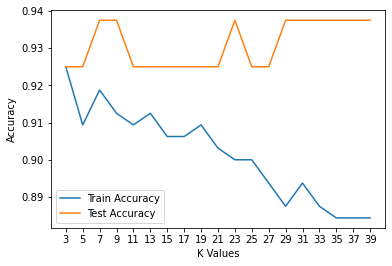

In [64]:
plt.plot(k,train_acc_list,label="Train Accuracy")
plt.plot(k,test_acc_list,label="Test Accuracy")
plt.xticks(k)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [75]:
pd.DataFrame({"K":k,"Train Accuracy":train_acc_list,"Test Accuracy":test_acc_list})

,K,Train Accuracy,Test Accuracy
0,3,0.925000,0.9250
1,5,0.909375,0.9250
2,7,0.918750,0.9375
3,9,0.912500,0.9375
4,11,0.909375,0.9250
5,13,0.912500,0.9250
6,15,0.906250,0.9250
7,17,0.906250,0.9250
8,19,0.909375,0.9250
9,21,0.903125,0.9250


### Real time prediction

In [50]:
dataset.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [51]:
age=35
salary=40000
gender="Male"

In [52]:
data=[[age,salary]]

In [53]:
data

[[35, 40000]]

In [54]:
data=sc.transform(data)

In [55]:
data

array([[0.4047619 , 0.18518519]])

In [56]:
knn_model.predict(data)

array([0], dtype=int64)

In [93]:
lor_model.sc=sc

#### Save the model

In [94]:
import joblib

In [95]:
joblib.dump(lor_model,"purchase_prediction.pkl")

['purchase_prediction.pkl']